In [1]:
import numpy as np

 
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

 

In [2]:
# Load Feature Vectors
import pandas as pd 

features = pd.read_csv('C:/Ptuxiakh/Ektelesh Python/Formatted Features (no PoZ).csv')

In [3]:
# Remove Files that are missing 40% of data or more 

PoZ = 0.4
features.drop(features[features.PoZ >= PoZ].index , inplace = True )
features.reset_index(drop = True, inplace= True)

# Split features into Data and Labels 
Y = pd.DataFrame(features.Class)
X = pd.DataFrame(features.drop(columns = 'Class'))
del PoZ

In [4]:
# Pipeline code should be added (a scaller most certainly before oversampling)

#Feature Handling
#Scalling all the features to [-1,1]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
Scaled_X = pd.DataFrame( scaler.transform(X), columns = X.columns)
X=Scaled_X
del Scaled_X

In [5]:
# OverSample the data to make up for class imbalance 
from imblearn.over_sampling import SMOTE, ADASYN  
X_resampled, Y_resampled = SMOTE().fit_resample(X,Y)

print('Percentage of files that belong to class Pre-ictal according to the whole dataset is: %f'   %(Y.sum()/Y.shape[0]) )

Using TensorFlow backend.


Percentage of files that belong to class Pre-ictal according to the whole dataset is: 0.145335


In [6]:
# Create Autocorrelation Matrix for both Balanced and Imbalanced datasets
Imbalanced_Features = features

Balanced_Features = X_resampled
m,n = Balanced_Features.shape
Balanced_Features.insert(n, "Class", Y_resampled, True)
Balanced_Features.columns = Imbalanced_Features.columns

del features

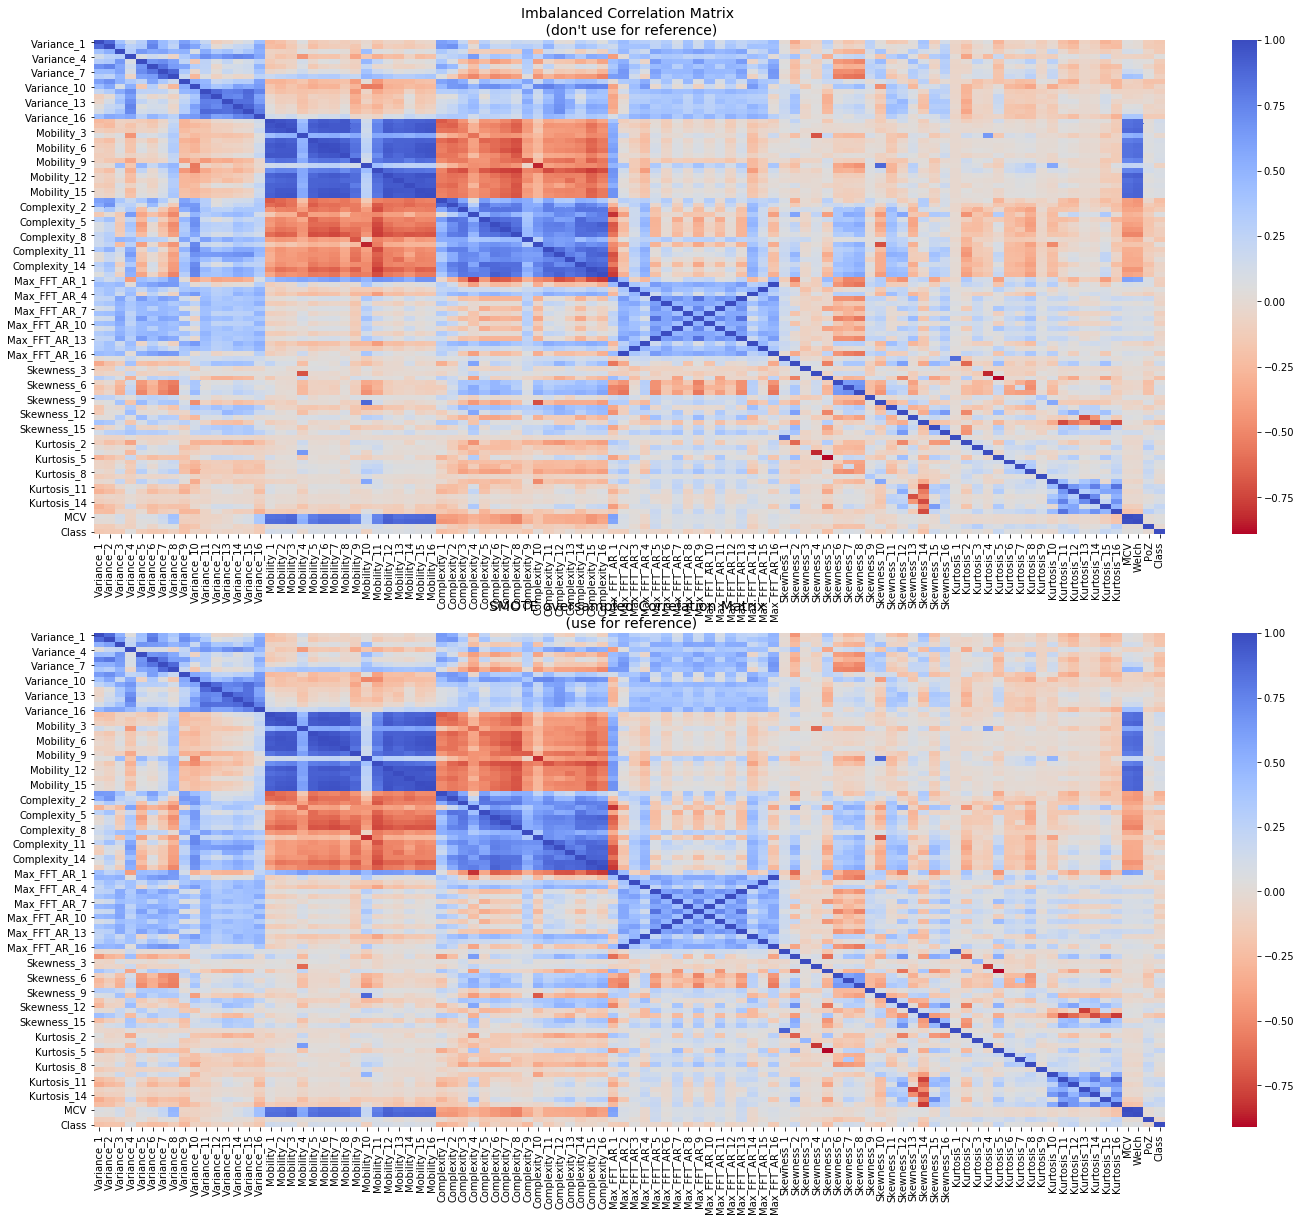

In [7]:
# Feature review and Selection
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))
# Entire DataFrame
corr = Imbalanced_Features.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


Smote_corr = Balanced_Features.corr()
sns.heatmap(Smote_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SMOTE oversampled Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

# Can try removing either complexity or mobility to see if the negative correlation improves accuracy
# However we see very small correlation when it comes to the class which is something we would expect

In [8]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state =42)
#X_train , X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state =42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

In [9]:
# pipe = Pipeline([('scaler', StanardScaler()), ('svc', SVC())])
# pipe.fit(X_train, y_train)
# print(pipe.score(X_test,y_test))
from sklearn.svm import SVC
clf=SVC()
print(X_train)
clf.fit(X_train,y_train)


[[ 0.63988629 -0.0430112  -0.24806814 ... -0.14966141 -0.232965
   0.        ]
 [-0.27041868 -0.20341928  0.88015491 ... -0.17482496  3.43780857
   1.        ]
 [ 1.23907121  0.93026625  2.17102675 ...  4.77021611 -0.3944307
   0.        ]
 ...
 [ 0.47463383  0.26046573  0.97634561 ... -0.13982827 -0.39559819
   0.        ]
 [-0.35362809 -0.52485272  0.18411403 ...  9.18845139 -0.23669243
   1.        ]
 [-0.24301324 -0.24092216 -0.23478308 ... -0.16579998  0.02697891
   1.        ]]


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [10]:
clf = SVC()

In [11]:
# Evaluating the classifier

# Cross Validation 
from sklearn.model_selection import cross_val_score
training_cv_score = cross_val_score(clf, X_train, y_train , cv = 5)
print(training_cv_score)

[0.99767981 0.99458623 0.98917247 0.99613302 0.99226006]


In [12]:
# Confusion Matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf , X_train, y_train, cv = 5)
from sklearn.metrics import confusion_matrix 
confusion_matrix(y_train, y_train_pred)

array([[3228,   32],
       [   7, 3197]], dtype=int64)

In [13]:
from sklearn.model_selection import cross_val_score
training_score = cross_val_score(clf, X_train, y_train, cv=5)

In [14]:
# Precision and Recall Score
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)

from sklearn.metrics import precision_score, recall_score 

print("Precision : %f" %precision_score(y_train, y_train_pred))
print("Recall : %f" %recall_score(y_train, y_train_pred))
from sklearn.metrics import f1_score
print("F1 Score : %f" %f1_score(y_train, y_train_pred))

Precision : 0.998130
Recall : 0.999688
F1 Score : 0.998908


In [17]:
y_test_pred = clf.predict(X_test)

from sklearn.metrics import precision_score, recall_score 

print("Precision : %f" %precision_score(y_test, y_test_pred))
print("Recall : %f" %recall_score(y_test, y_test_pred))
from sklearn.metrics import f1_score
print("F1 Score : %f" %f1_score(y_test, y_test_pred))

Precision : 0.990521
Recall : 1.000000
F1 Score : 0.995238
